In [ ]:
#importing libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score,
 recall_score, f1_score, mean_squared_error, r2_score, mean_absolute_error

# Preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Data preprocessing

In [ ]:
#reading dataset
data=pd.read_csv("/content/Student_Performance.csv")
sp=pd.DataFrame(data)
sp.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
#checking if there is any NA values
sp.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
#deleting dublicates
sp.drop_duplicates(inplace=True)

In [ ]:
#checking numerical data
sp.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
# Preprocessing on Extracurricular Activities column maping data where yes = 1 / no = 0
sp['Extracurricular Activities'] = sp['Extracurricular Activities'].str.strip().str.capitalize()
sp['Extracurricular Activities'] = sp['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

sp.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
#converting performance index into float
sp['Performance Index'] = sp['Performance Index'].astype(float)


In [ ]:
#renaming columns
sp.columns = sp.columns.str.replace(' ', '_')
sp.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
sp.to_csv('preprocessed_data.csv', index=False)

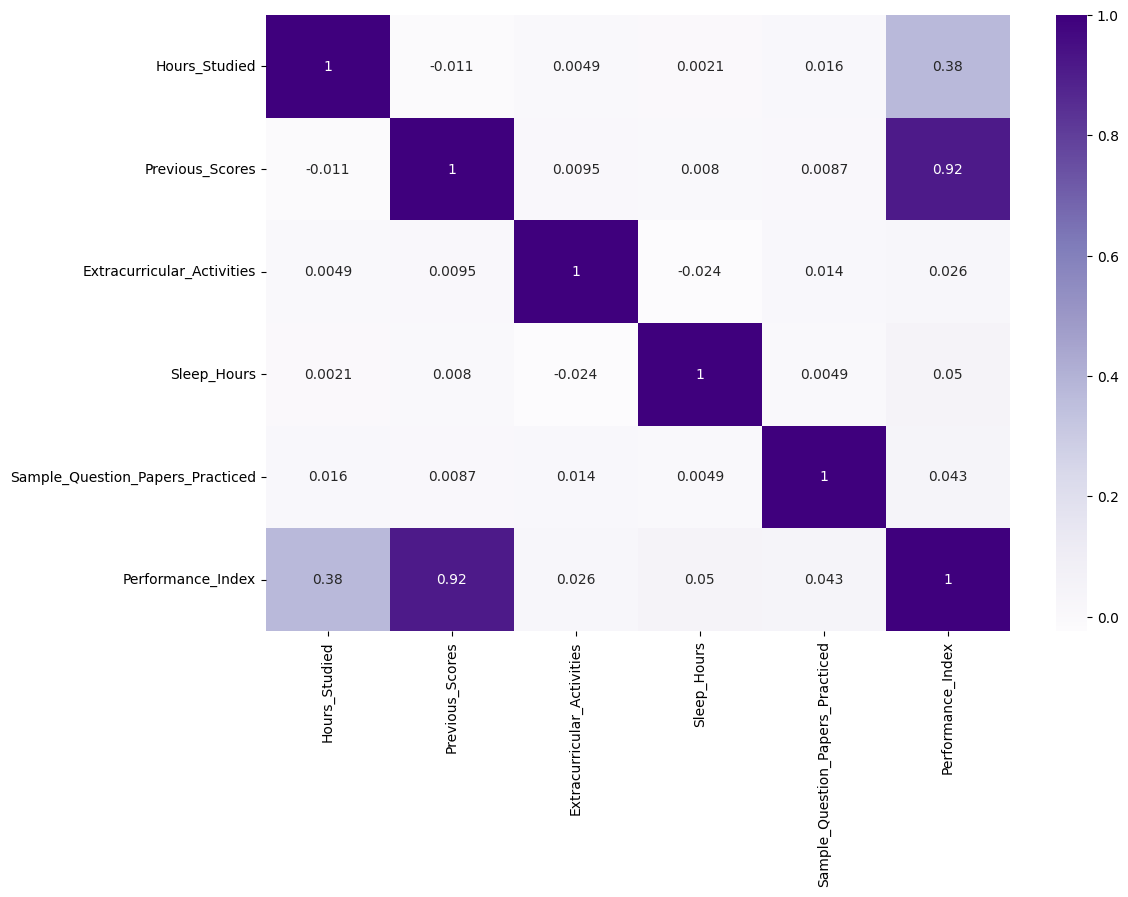

In [ ]:
#checking corelation between each column using heatmap
cor_data=sp.corr()

plt.figure(figsize=(12,8))
sns.heatmap(cor_data, annot=True, cmap='Purples')
plt.show()

## 1-Simple linear regression

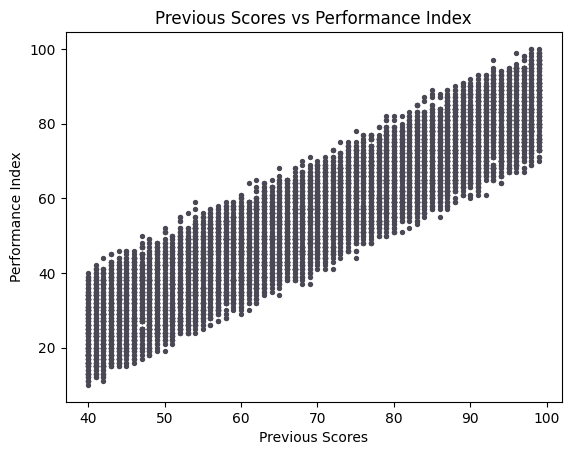

In [ ]:
#explarind relation between performance index and previous scores using scatter plot
plt.scatter(sp.Previous_Scores, sp.Performance_Index, s=8,
            color="#4B4855")
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.title("Previous Scores vs Performance Index")
plt.show()

In [ ]:
#creating DFs x:feature  y:target
x = sp[['Previous_Scores']].values
y = sp[['Performance_Index']].values


In [ ]:
#spliting data into train - test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [ ]:
#applaying model
sr=LinearRegression()
sr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#getting intercept and coefficint
theta1 = sr.coef_[0]
theta0 = sr.intercept_

print(f'Y = {theta0[0]} + {theta1[0]} X')

Y = -15.274036971189489 + 1.0150033584902936 X


In [ ]:
#predicting data on test df
y_pred = sr.predict(x.reshape(-1, 1))
y_pred

array([[85.21129552],
       [67.95623843],
       [36.49113431],
       ...,
       [68.97124178],
       [83.1812888 ],
       [59.83621156]])

In [ ]:
#checking MSE and R2 of the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squares Error (MSE): %.2f" % mse)
print("R2-Score: %.2f" % r2)

Mean Squares Error (MSE): 59.96
R2-Score: 0.84


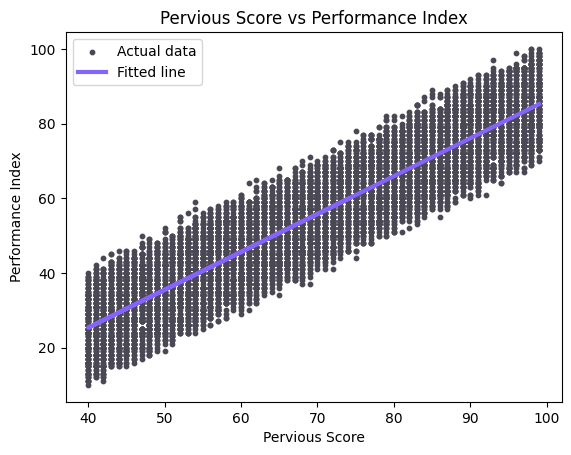

In [ ]:
#visualizing regression line using scatter plot
plt.scatter(x, y, color='#4B4855', label='Actual data', s=10)
plt.plot(x, y_pred, color='#8564FA', label='Fitted line', linewidth=3)
plt.xlabel("Pervious Score")
plt.ylabel("Performance Index")
plt.title("Pervious Score vs Performance Index")
plt.legend()
plt.show()

## 2-Multiple Linear Regression:

In [ ]:
#creating dataframes for independent and dependent variables
MX = sp[['Previous_Scores', 'Hours_Studied']].values

My = sp['Performance_Index'].values

In [ ]:
#spliting data into training and testing sets
MX_train, MX_test, My_train, My_test = train_test_split(MX, My, test_size=0.2, random_state=42)

In [ ]:
#training reg model
MultiReg = LinearRegression()
MultiReg.fit(MX_train, My_train)

LinearRegression()

In [ ]:
#predict
MultiReg_pred = MultiReg.predict(MX_test)

In [ ]:
#getting accuracy of model to check if there is over fitting (lower MAE is better)

# Train accuracy
train_pred = MultiReg.predict(MX_train)
train_mae = mean_absolute_error(My_train, train_pred)

# Test accuracy
test_pred = MultiReg.predict(MX_test)
test_mae = mean_absolute_error(My_test, test_pred)

print("trainimg accuracy", train_mae)
print("testing accuracy",test_mae)

trainimg accuracy 1.8101673445426025
testing accuracy 1.879830829570554


In [ ]:
#getting MSE and R2
MR_MSE = mean_squared_error(My_test, MultiReg_pred)
MR_R2 = r2_score(My_test, MultiReg_pred)

#printing coffecients/intercept
print("Coefficients:", MultiReg.coef_)
print("Intercept:", MultiReg.intercept_)
print("Mean Squares Error (MSE): %.2f" % MR_MSE)
print("R2-Score: %.2f" % MR_R2)

Coefficients: [1.01875676 2.85506398]
Intercept: -29.78210590180116
Mean Squares Error (MSE): 5.57
R2-Score: 0.99


Conclusion:
on comparing simple linear regression with Multiple Linear Regression we find that MSE is smaller in multiple linear regression to simple linear regression (5.57 : 59.96 ) also it has higher R2,better fitting, (0.99 : 0.84)  

so, adding more features helps in improving the model's accuracy and lowering the errors

## Polynomial Regression

In [ ]:
#creating df
Px = sp.loc[500:700,['Previous_Scores']].values # Get just 200 rows
Py = sp.loc[500:700, ['Performance_Index']].values

In [ ]:
#applaying regression model
PolyRegModel= LinearRegression()
PolyRegModel.fit(Px, Py)

LinearRegression()

## Using deg of 2

In [ ]:
x=-5
if x:
  print("true")

true


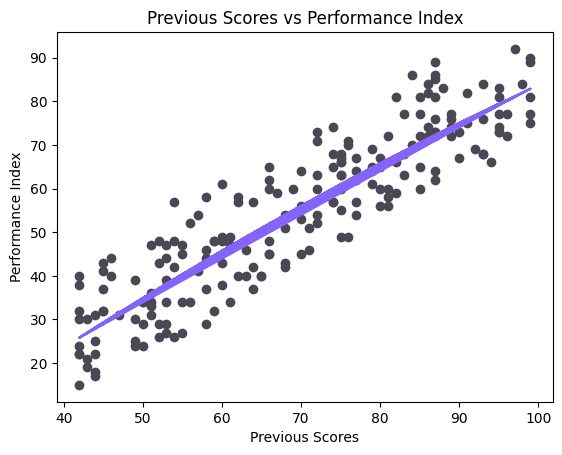

In [ ]:
#applaying visualization on deg2 poly reg
plt.scatter(Px, Py,color="#4B4855")
plt.plot(Px, lin_reg2.predict(poly_reg.fit_transform(Px)), color='#8564FA')
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.title("Previous Scores vs Performance Index")
plt.show()


In [ ]:
#getting MSE and R2 with deg 2
Py_pred2 = lin_reg2.predict(poly_reg.fit_transform(Px))
Py_MSE2 = mean_squared_error(Py, Py_pred2)
Py_R22 = r2_score(Py, Py_pred2)

print("Mean Squares Error (MSE): %.2f" % Py_MSE2)
print("R2-Score: %.2f" % Py_R22)

Mean Squares Error (MSE): 61.61
R2-Score: 0.82


## Using deg of 3

In [ ]:
#fitting data using deg of 2
poly_reg= PolynomialFeatures(degree=3)
Px_poly = poly_reg.fit_transform(Px)
lin_reg3 = LinearRegression()
lin_reg3.fit(Px_poly, Py)

LinearRegression()

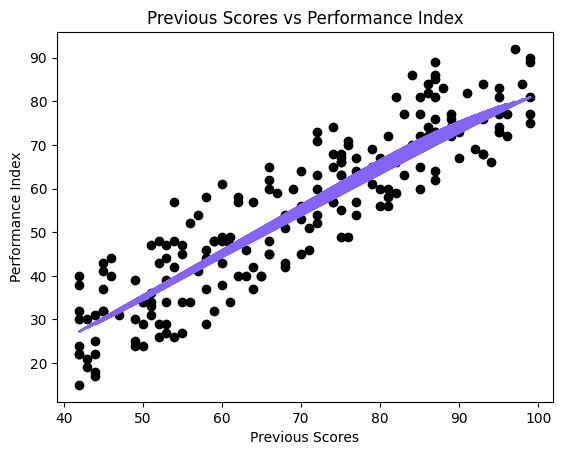

In [ ]:
#applaying visualization on deg3 poly reg
plt.scatter(Px, Py,color="black")
plt.plot(Px, lin_reg3.predict(poly_reg.fit_transform(Px)), color='#8564FA')
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.title("Previous Scores vs Performance Index")
plt.show()


In [ ]:
#getting MSE and R2 with deg 3
Py_pred3 = lin_reg3.predict(poly_reg.fit_transform(Px))
Py_MSE3 = mean_squared_error(Py, Py_pred3)
Py_R23 = r2_score(Py, Py_pred3)


print("Mean Squares Error (MSE): %.2f" % Py_MSE3)
print("R2-Score: %.2f" % Py_R23)

Mean Squares Error (MSE): 61.07
R2-Score: 0.82


## Using deg of 4

In [ ]:
#fitting data using deg of 2
poly_reg= PolynomialFeatures(degree=4)
Px_poly = poly_reg.fit_transform(Px)
lin_reg4 = LinearRegression()
lin_reg4.fit(Px_poly, Py)

LinearRegression()

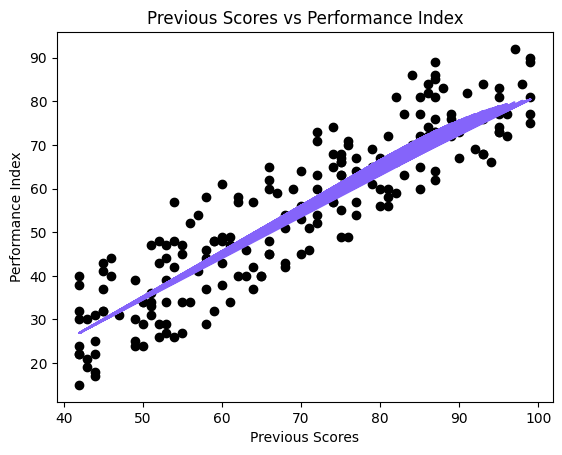

In [ ]:
#applaying visualization on deg4 poly reg
plt.scatter(Px, Py,color="black")
plt.plot(Px, lin_reg4.predict(poly_reg.fit_transform(Px)), color='#8564FA')
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.title("Previous Scores vs Performance Index")
plt.show()


In [ ]:
#getting MSE and R2 with deg 2
Py_pred4 = lin_reg4.predict(poly_reg.fit_transform(Px))
Py_MSE4 = mean_squared_error(Py, Py_pred4)
Py_R24 = r2_score(Py, Py_pred4)

print("Mean Squares Error (MSE): %.2f" % Py_MSE4)
print("R2-Score: %.2f" % Py_R24)

Mean Squares Error (MSE): 61.03
R2-Score: 0.82


## Logistic Regression with Classification

In [ ]:
#creating data frames
Lx= sp[['Performance_Index']]# Based on Correlation Matric
Ly= sp['Extracurricular_Activities']

In [ ]:
Ly.value_counts()

,count
Extracurricular_Activities,
0,4986
1,4887


In [ ]:
#spliting data into train-test
Lx_train, Lx_test, Ly_train, Ly_test = train_test_split(Lx, Ly, test_size=0.2,
                                                        random_state=1)

In [ ]:
lg_reg = LogisticRegression()
lg_reg.fit(Lx_train,Ly_train)

LogisticRegression()

In [ ]:
#creating confussion matrix
Ly_pred = lg_reg.predict(Lx_test)
Ly_pred

array([0, 0, 1, ..., 0, 1, 1])

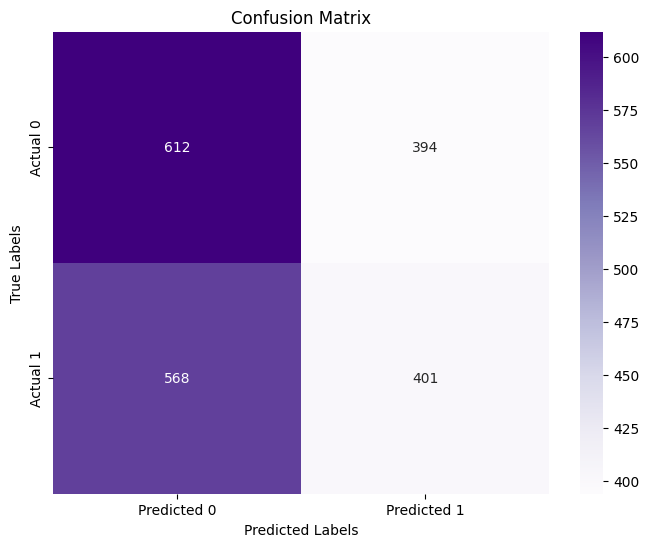

In [ ]:
ConfuMat = confusion_matrix(Ly_test, Ly_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(ConfuMat, annot=True, fmt='g', cmap='Purples',
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
#getting cooffecients and intercept
Ly_pred = lg_reg.predict(Lx)
print("coff:", lg_reg.coef_)
print("intercept:", lg_reg.intercept_)
accuracy = metrics.accuracy_score(Ly, Ly_pred)
print('accuracy: ',accuracy)

coff: [[0.00246717]]
intercept: [-0.15195433]
accuracy:  0.5094702724602451


## conclusion
In this analysis, we applied and compared four different regression models: Simple Linear Regression, Multiple Linear Regression, Polynomial Regression, and Logistic Regression. Each was evaluated based on its ability to model and predict student performance, using various features from the dataset.

#Simple Linear Regression:

* MSE: 59.96

* R² Score: 0.84

* Only considered "Previous Scores" as the predictor(The highest correlation).




#Multiple Linear Regression:

* MSE: 5.57

* R² Score: 0.99

* Considered both "Previous Scores" and "Hours Studied".

* Demonstrated a huge improvement over simple regression — lower error and near-perfect fit — proving that incorporating more relevant features significantly boosts model performance.

#Polynomial Regression
* Applied to a subset of 200 rows.

at degree = 2 :

* MSE: 61.61

* R² Score: 0.82

at degree = 3 :

* MSE: 61.07

* R² Score: 0.82

at degree = 4 :

* MSE: 61.03

* R² Score: 0.82
  conclusion:
* using higher degree leads to slightly lowering MSE but doesn't affect R2

* Slightly underperformed compared to linear models, likely due to high corelarion between the feature and the target.

* Despite its flexibility in fitting non-linear patterns, in this case, it did not outperform multiple linear regression.

#Logistic Regression (Classification):

* Used to classify Extracurricular Activities (Yes/No) based on Performance Index.

* Confusion matrix was used for evaluation.

* While not directly comparable to the regression models (since it's a classification task), it showed reasonable predictive ability and helped explore categorical relationships in the data with accuracy = 0.51.

* for some reason, it showed some bias to the 0s over to the 1s, likely because the corelarion between the feature and the target wasn't that hight evem though it is the highest compared to the other features.


#The Best Performing Model: Multiple Linear Regression
 It has low error and high R², Multiple Linear Regression clearly outperformed the others in predicting performance index. It captured the relationship between features more effectively and generalizes well, proving that adding relevant predictors significantly enhances model accuracy.


### So, feature selection and dataset size greatly impact regression model performance. While more complex models (like polynomial regression) might seem appealing, they don't always guarantee better performance — especially on smaller or noisy datasets.



---



---

